In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_json('logins.json', convert_dates=True)
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [5]:
df['counts'] = 1
df.head()

,login_time,counts
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [6]:
df = df.set_index('login_time').resample('15T').sum()

In [7]:
df.reset_index(inplace=True)
df.head()

,login_time,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


Logins Times for 01 Jan to 13 Apr 1970 are available.

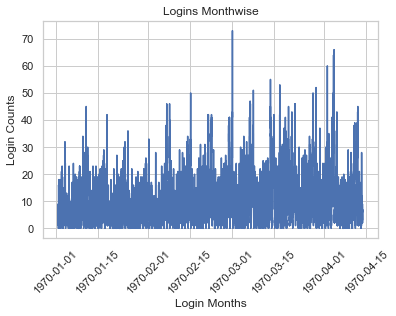

In [8]:
sns.set_theme(style="whitegrid")
plt.plot(df['login_time'], df['counts'])
plt.xticks(rotation=45)
plt.xlabel('Login Months')
plt.ylabel('Login Counts')
plt.title('Logins Monthwise')
plt.show()

In [9]:
df.groupby(df['login_time'].dt.strftime('%B'))['counts'].sum().sort_values()

login_time
April       13507
January     21239
February    24673
March       33723
Name: counts, dtype: int64

Let's break it month-wise

In [10]:
jan = df[(df['login_time'] > '1970-01') & (df['login_time'] <'1970-02')]
feb = df[(df['login_time'] > '1970-02') & (df['login_time'] <'1970-03')]
mar = df[(df['login_time'] > '1970-03') & (df['login_time'] <'1970-04')]
apr = df[(df['login_time'] > '1970-04')]

In [11]:
jan.head()

,login_time,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [12]:
jan.describe()

,counts
count,2896.000000
mean,7.333909
std,6.099863
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,45.000000


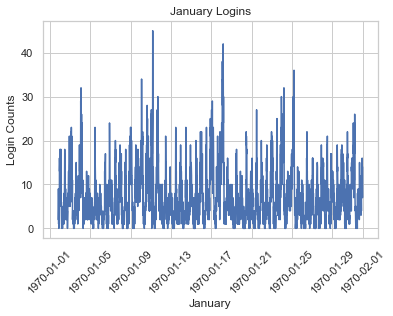

In [13]:
plt.plot(jan['login_time'], jan['counts'])
plt.xticks(rotation=45)
plt.xlabel('January')
plt.ylabel('Login Counts')
plt.title('January Logins')
plt.show()

In [14]:
feb.head()

,login_time,counts
2897,1970-02-01 00:15:00,11
2898,1970-02-01 00:30:00,17
2899,1970-02-01 00:45:00,15
2900,1970-02-01 01:00:00,16
2901,1970-02-01 01:15:00,7


In [15]:
feb.describe()

,counts
count,2687.000000
mean,9.177894
std,7.797917
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,50.000000


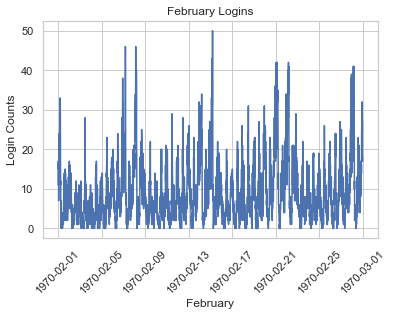

In [16]:
plt.plot(feb['login_time'], feb['counts'])
plt.xticks(rotation=45)
plt.xlabel('February')
plt.ylabel('Login Counts')
plt.title('February Logins')
plt.show()

In [17]:
mar.head()

,login_time,counts
5585,1970-03-01 00:15:00,19
5586,1970-03-01 00:30:00,17
5587,1970-03-01 00:45:00,12
5588,1970-03-01 01:00:00,20
5589,1970-03-01 01:15:00,21


In [18]:
mar.describe()

,counts
count,2975.000000
mean,11.330084
std,9.336997
min,0.000000
25%,4.000000
50%,9.000000
75%,16.000000
max,73.000000


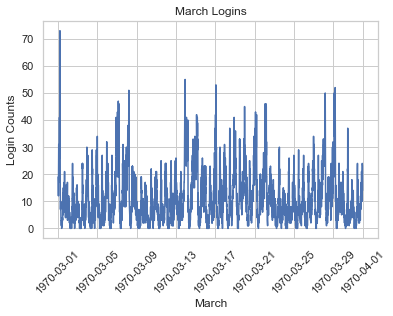

In [19]:
plt.plot(mar['login_time'], mar['counts'])
plt.xticks(rotation=45)
plt.xlabel('March')
plt.ylabel('Login Counts')
plt.title('March Logins')
plt.show()

In [20]:
apr.head()

,login_time,counts
8561,1970-04-01 00:15:00,11
8562,1970-04-01 00:30:00,14
8563,1970-04-01 00:45:00,19
8564,1970-04-01 01:00:00,16
8565,1970-04-01 01:15:00,16


In [21]:
apr.describe()

,counts
count,1227.000000
mean,10.995925
std,9.973251
min,0.000000
25%,4.000000
50%,8.000000
75%,15.000000
max,66.000000


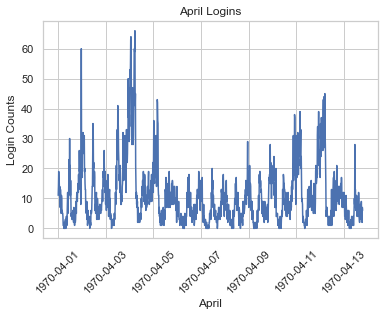

In [22]:
plt.plot(apr['login_time'], apr['counts'])
plt.xticks(rotation=45)
plt.xlabel('April')
plt.ylabel('Login Counts')
plt.title('April Logins')
plt.show()

Weekday logins

In [23]:
df['weekdays'] = df['login_time'].dt.dayofweek
df.head()

,login_time,counts,weekdays
0,1970-01-01 20:00:00,2,3
1,1970-01-01 20:15:00,6,3
2,1970-01-01 20:30:00,9,3
3,1970-01-01 20:45:00,7,3
4,1970-01-01 21:00:00,1,3


In [24]:
df_weekdays = df.sort_values(by='counts', ascending=False)
df_weekdays

,login_time,counts,weekdays
5602,1970-03-01 04:30:00,73,6
8870,1970-04-04 05:30:00,66,5
8854,1970-04-04 01:30:00,64,5
8853,1970-04-04 01:15:00,63,5
8654,1970-04-01 23:30:00,60,2
...,...,...,...
919,1970-01-11 09:45:00,0,6
4369,1970-02-16 08:15:00,0,0
2450,1970-01-27 08:30:00,0,1
2449,1970-01-27 08:15:00,0,1


In [25]:
weekdaycounts = df_weekdays[['counts', 'weekdays']]
weekdaycounts = weekdaycounts.groupby('weekdays').sum().reset_index()
weekdaycounts

,weekdays,counts
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


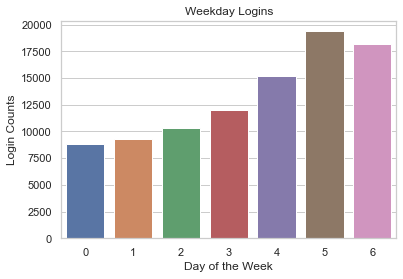

In [26]:
sns.barplot(x= 'weekdays', y='counts', data=weekdaycounts)
plt.xlabel('Day of the Week')
plt.title('Weekday Logins')
plt.ylabel('Login Counts')
plt.show()

### This barplot indicates a higher demand on weekends compared to weekdays

In [27]:
df['hourly'] = df['login_time'].dt.hour
df.head()

,login_time,counts,weekdays,hourly
0,1970-01-01 20:00:00,2,3,20
1,1970-01-01 20:15:00,6,3,20
2,1970-01-01 20:30:00,9,3,20
3,1970-01-01 20:45:00,7,3,20
4,1970-01-01 21:00:00,1,3,21


In [28]:
df_hourly = df.sort_values(by='counts', ascending=False)
df_hourly

,login_time,counts,weekdays,hourly
5602,1970-03-01 04:30:00,73,6,4
8870,1970-04-04 05:30:00,66,5,5
8854,1970-04-04 01:30:00,64,5,1
8853,1970-04-04 01:15:00,63,5,1
8654,1970-04-01 23:30:00,60,2,23
...,...,...,...,...
919,1970-01-11 09:45:00,0,6,9
4369,1970-02-16 08:15:00,0,0,8
2450,1970-01-27 08:30:00,0,1,8
2449,1970-01-27 08:15:00,0,1,8


In [29]:
hourlycounts = df_hourly[['counts', 'hourly']]
hourlycounts = hourlycounts.groupby('hourly').sum().reset_index()
hourlycounts

,hourly,counts
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


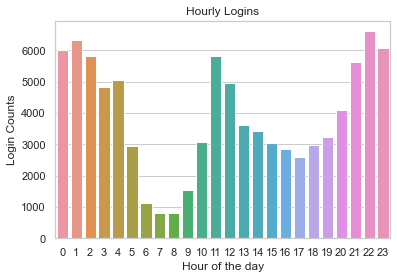

In [30]:
sns.barplot(x= 'hourly', y='counts', data=hourlycounts)
plt.xlabel('Hour of the day')
plt.title('Hourly Logins')
plt.ylabel('Login Counts')
plt.show()

### The demand is peak at mid-night hours(2100hrs-0200hrs) and mid-day hours(1100hrs-1200hrs)